## Project Title: Tweet Emotion Recognition: Natural Language Processing with TensorFlow

**Project Description:**

In today's digital age, social media platforms like Twitter have become a significant source of expressing emotions, opinions, and sentiments. Analyzing the emotions expressed in tweets can provide valuable insights into public sentiment and can be used for a variety of applications, from brand sentiment analysis to tracking public sentiment during crises. The "Tweet Emotion Recognition: Natural Language Processing with TensorFlow" project aims to harness the power of natural language processing (NLP) and deep learning to automatically recognize and categorize emotions in tweets.

**Objective:**

The main objective of this project is to develop a machine learning model for emotion recognition in tweets using the TensorFlow framework. This model will be capable of classifying tweets into different emotional categories, such as happiness, sadness, anger, and more. The project's goals include:

1. **Data Collection:** Obtain and preprocess the [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset) to create a clean and well-structured dataset for training and testing the emotion recognition model.

2. **Data Exploration:** Analyze the dataset to gain insights into the distribution of emotions in tweets and any patterns or trends in emotional expressions.

3. **Natural Language Processing:** Implement text preprocessing techniques, such as tokenization, stop-word removal, and text vectorization, to prepare the text data for machine learning.

4. **Model Selection:** Experiment with various deep learning models, such as recurrent neural networks (RNNs), long short-term memory (LSTM) networks, and transformers, to find the most suitable architecture for emotion recognition.(*This notebook uses LSTM*)

5. **Model Training:** Train the selected model on the preprocessed dataset, optimizing hyperparameters and using techniques like transfer learning and data augmentation to improve performance.

6. **Evaluation:** Evaluate the model's performance using appropriate metrics, such as accuracy, precision, recall, and F1 score, and visualize the results to understand its strengths and weaknesses.

7. **Fine-Tuning:** Fine-tune the model to improve its accuracy and ability to handle real-world tweets with different writing styles and sentiments.

8. **Documentation and Reporting:** Create detailed documentation, including a user guide and technical documentation for the project. Prepare a report summarizing the project's methodology, results, and potential use cases.

9. **Future Improvements:** Discuss potential future improvements, such as expanding the emotion categories, multilingual support, and incorporating user-specific context.

**Skills and Tools:**

- Python
- TensorFlow and Keras
- Natural Language Processing techniques
- Deep Learning architectures
- Data preprocessing and cleaning
- Model evaluation and visualization
- Version control (e.g., Git)
- Documentation and reporting skills

This project will be a valuable resource for those interested in NLP, sentiment analysis, and emotion recognition, and it can be a stepping stone for more advanced applications like social media monitoring, mental health support, and customer feedback analysis.


---

## Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.2 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.13.0


## Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
import nlp
import json

# Define the file paths to your uploaded JSONL files
train_file_path = '/content/train.jsonl'
validation_file_path = '/content/validation.jsonl'
test_file_path = '/content/test.jsonl'

# Initialize empty lists to store the datasets
train_dataset = []
validation_dataset = []
test_dataset = []

# Load the train dataset
with open(train_file_path, 'r') as train_file:
    for line in train_file:
        json_object = json.loads(line)
        train_dataset.append(json_object)

# Load the validation dataset
with open(validation_file_path, 'r') as validation_file:
    for line in validation_file:
        json_object = json.loads(line)
        validation_dataset.append(json_object)

# Load the test dataset
with open(test_file_path, 'r') as test_file:
    for line in test_file:
        json_object = json.loads(line)
        test_dataset.append(json_object)

# Now you have three separate datasets: train_dataset, validation_dataset, and test_dataset


In [ ]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets,labels

In [ ]:
tweets,labels = get_tweet(train_dataset)

In [ ]:
tweets[0], labels[0]

('i didnt feel humiliated', 0)

## Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

What is Tokenization and why is it needed?

The string of the tweet needs to be represented as numbers to be able to train machine learning models. Tokenization is conversion of the words to numbers. A simple approach the tokenizer uses is to create a corpus all the words that exist in the dataset to assign every unique word to a unique corresponding token. A limit can also be set to how many frequently used words  are to tokenized and rest less commonly used words are ignored. Less common words are given a common token of out of vocabolary or unkown word token.

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

## Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

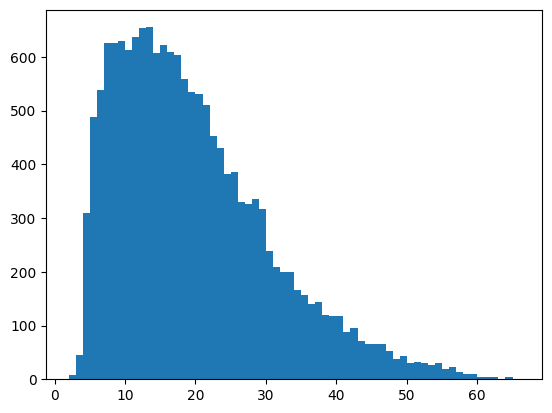

In [ ]:
lengths = [len(t.split()) for t in tweets]

# Plot the histogram
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [ ]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer,tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating = 'post', padding = 'post', maxlen = maxlen)
  return padded

In [ ]:
padded_train_seq = get_sequences(tokenizer,tweets)

In [ ]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


'0': sadness,
'1': joy,
'2': love,
'3': anger,
'4': fear,
'5': surprise

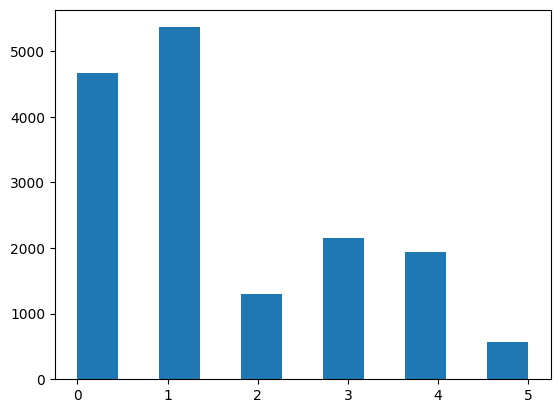

In [ ]:
plt.hist(labels, bins=11)
plt.show()

In [ ]:
names_to_ids = lambda labels: np.array(x for x in labels)

In [ ]:
train_labels = np.array(labels)

In [ ]:
train_labels

array([0, 0, 3, ..., 1, 3, 0])

## Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirection  (None, 50, 40)            5920      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175926 (687.21 KB)
Trainable params: 175926 (687.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets, val_labels = get_tweet(validation_dataset)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = np.array(val_labels)

In [ ]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
print("Shape of padded_train_seq:", padded_train_seq.shape)
print("Shape of train_labels:", train_labels.shape)


Shape of padded_train_seq: (16000, 50)
Shape of train_labels: (16000,)


In [ ]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data=(val_seq, val_labels),
    epochs = 20,
    callbacks =[
        tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2)
    ]
)

Epoch 1/20
500/500 [==============================] - 11s 22ms/step - loss: 0.7202 - accuracy: 0.7451 - val_loss: 0.6033 - val_accuracy: 0.8110
Epoch 2/20
500/500 [==============================] - 8s 17ms/step - loss: 0.3909 - accuracy: 0.8742 - val_loss: 0.4582 - val_accuracy: 0.8505
Epoch 3/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2731 - accuracy: 0.9115 - val_loss: 0.4933 - val_accuracy: 0.8475
Epoch 4/20
500/500 [==============================] - 8s 16ms/step - loss: 0.1867 - accuracy: 0.9401 - val_loss: 0.3505 - val_accuracy: 0.8825
Epoch 5/20
500/500 [==============================] - 8s 17ms/step - loss: 0.1314 - accuracy: 0.9601 - val_loss: 0.3847 - val_accuracy: 0.8875
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.1063 - accuracy: 0.9668 - val_loss: 0.4137 - val_accuracy: 0.8900
Epoch 7/20
500/500 [==============================] - 9s 17ms/step - loss: 0.0877 - accuracy: 0.9734 - val_loss: 0.3908 - val_accuracy: 0.902

## Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

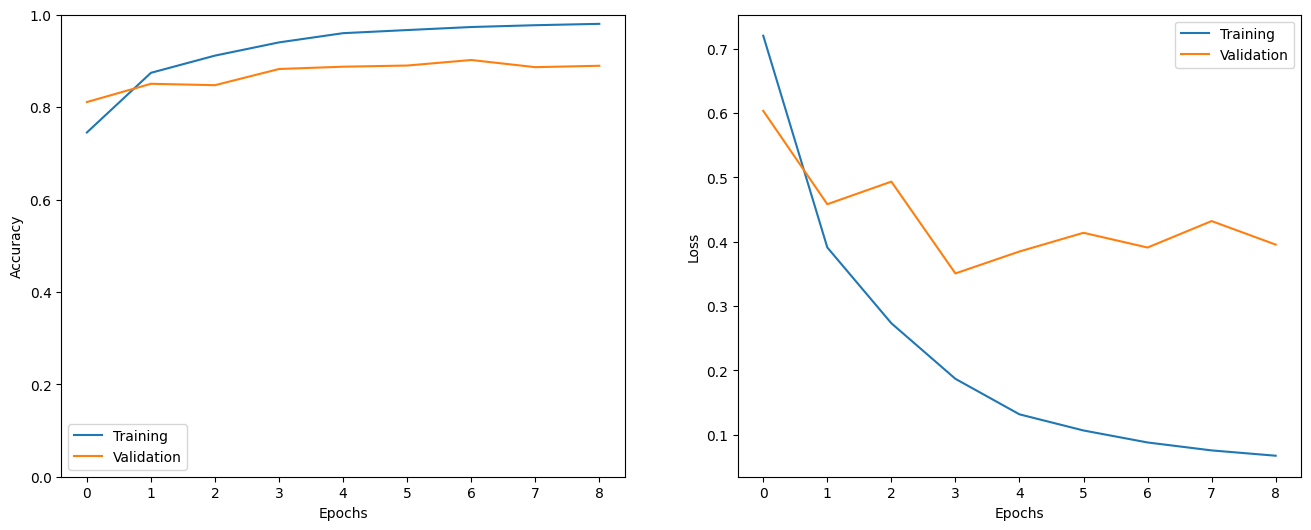

In [ ]:
show_history(h)

In [ ]:
test_tweets, test_labels = get_tweet(test_dataset)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = np.array(test_labels)

In [ ]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 1s 9ms/step - loss: 0.4114 - accuracy: 0.8785


In [ ]:
i = random.randint(0, len(test_labels) - 1)
print('Sentence:', test_tweets[i])
print('Emotion:', test_labels[i])

p= model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class = np.argmax(p).astype('uint8')

print('Predicted Emotion:', pred_class)

Sentence: i can cycle further than ever before and the feeling of finishing the manchester to blackpool miles then not being at all bothered at having to ride an extra mile to put
Emotion: 3
1/1 [==============================] - 0s 27ms/step
Predicted Emotion: 3


In [ ]:
preds = model.predict(test_seq)
# Convert continuous probabilities to class predictions
predicted_labels = np.argmax(preds, axis=1)


63/63 [==============================] - 1s 8ms/step


array([[9.9920386e-01, 3.6216795e-04, 8.0809205e-06, 2.6811170e-04,
        1.5608480e-04, 1.6627550e-06],
       [9.9911469e-01, 3.7488888e-04, 1.0074825e-05, 3.3428811e-04,
        1.6395708e-04, 2.1074479e-06],
       [9.9860340e-01, 4.9449794e-04, 1.5202207e-05, 5.3810992e-04,
        3.4480949e-04, 3.9384227e-06],
       ...,
       [5.6304445e-04, 9.9844724e-01, 1.2264887e-04, 6.5412314e-06,
        8.5267104e-04, 7.8649136e-06],
       [3.1339264e-04, 9.9942458e-01, 1.8466938e-04, 3.0515318e-06,
        7.1270435e-05, 3.0620499e-06],
       [2.1397369e-04, 3.5628765e-03, 8.1360806e-03, 2.4065659e-03,
        7.3257081e-02, 9.1242349e-01]], dtype=float32)

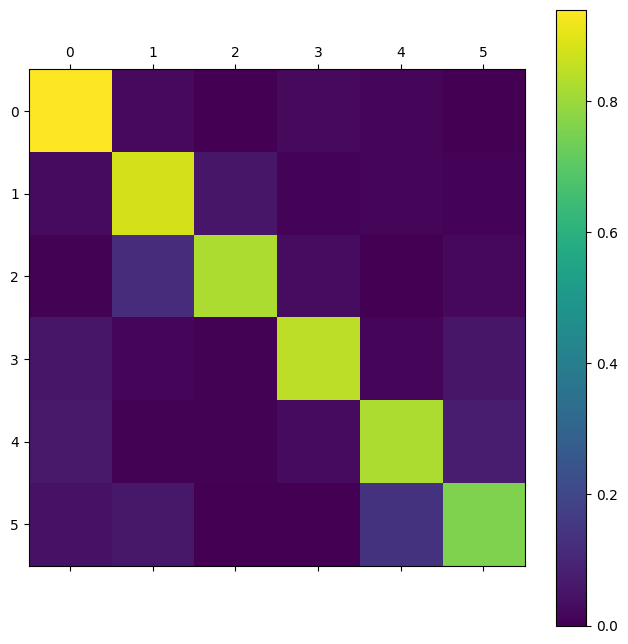

In [ ]:
show_confusion_matrix(test_labels, predicted_labels, classes)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Convert continuous probabilities to class predictions
predicted_labels = np.argmax(preds, axis=1)

# Calculate the confusion matrix
confusion = confusion_matrix(test_labels, predicted_labels)

# Calculate the accuracy
accuracy = accuracy_score(test_labels, predicted_labels)

# Print or visualize the confusion matrix
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)

Confusion Matrix:
[[546  14   0  14   7   0]
 [ 20 612  40   7   9   7]
 [  1  19 131   5   0   3]
 [ 16   4   2 233   4  16]
 [ 14   1   1   6 185  17]
 [  3   4   0   0   9  50]]
Accuracy: 0.8785


## Results

The LSTM model with two Bidirectional layers and a dense layer with softmax activation proved to be the best choice for tweet emotion recognition. With an accuracy of 87.85%, the model demonstrated robust performance in classifying tweets into multiple emotional categories. The confusion matrix analysis and accuracy assessment provided further validation of the model's effectiveness, confirming its ability to accurately categorize tweets based on emotions such as sadness, joy, love, anger, fear, and surprise.


## Conclusion

The LSTM model's success in accurately recognizing emotions in tweets highlights its potential for various real-world applications. By providing valuable insights into public sentiment and emotional trends, the model contributes to a deeper understanding of user behaviors and preferences on social media platforms. Further enhancements, such as multilingual support and expanded emotion categories, could extend the model's utility in diverse linguistic and cultural contexts.